Import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Read the csv file of heart disease from kaggle.

In [2]:
heart_data=pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Use describe() to see the basic information of the data.

In [3]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Lets check the data type for all the features (columns) of the data and also if there are any null values in any columns. Using info(), we can see below that there are 303 rows and non contains null value.

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Number of unique values in each features.

In [5]:
{x:len(heart_data[x].unique()) for x in heart_data}

{'age': 41,
 'ca': 5,
 'chol': 152,
 'cp': 4,
 'exang': 2,
 'fbs': 2,
 'oldpeak': 40,
 'restecg': 3,
 'sex': 2,
 'slope': 3,
 'target': 2,
 'thal': 4,
 'thalach': 91,
 'trestbps': 49}

Here, 'target' is the one we will try to predict where 0 means no disease and 1 means the patient has heart disease.

<function matplotlib.pyplot.show>

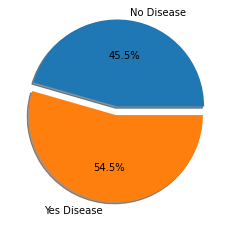

In [6]:
total=len(heart_data)
with_disease=heart_data['target'].sum()
no_disease=total-with_disease
labels=['No Disease',"Yes Disease"]
plt.pie([no_disease,with_disease],labels=labels,shadow=True,explode=(0.1,0),autopct='%1.1f%%')
plt.show

Distribution of data in terms of features like thalach, trestbps, chol, and age. Light blue indicates distribution of no heart disease and light orange indicates distribution of positive heart disease.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


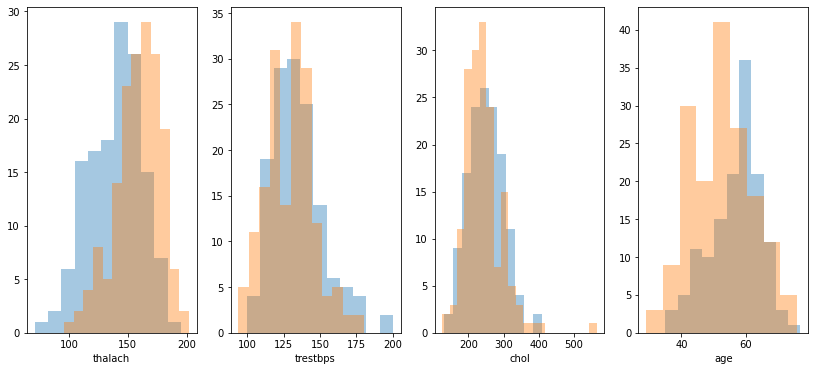

In [7]:
fig,axs=plt.subplots(ncols=4,figsize=(14,6))
sns.distplot(heart_data[heart_data['target']==0]['thalach'],kde=False,ax=axs[0])
sns.distplot(heart_data[heart_data['target']==1]['thalach'],kde=False,ax=axs[0])

sns.distplot(heart_data[heart_data['target']==0]['trestbps'],kde=False,ax=axs[1])
sns.distplot(heart_data[heart_data['target']==1]['trestbps'],kde=False,ax=axs[1])

sns.distplot(heart_data[heart_data['target']==0]['chol'],kde=False,ax=axs[2])
sns.distplot(heart_data[heart_data['target']==1]['chol'],kde=False,ax=axs[2])

sns.distplot(heart_data[heart_data['target']==0]['age'],kde=False,ax=axs[3])
sns.distplot(heart_data[heart_data['target']==1]['age'],kde=False,ax=axs[3])

By looking at above distributions, the chance of having a heart disease seems to high with increase in thalach, and seems high with low age. Let's see the scatter plot between age and thalach.

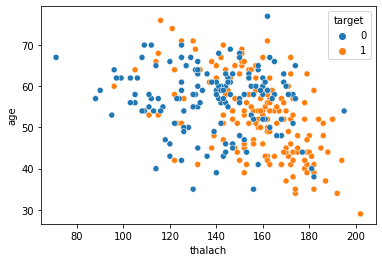

In [8]:
sns.scatterplot(x='thalach',y='age',data=heart_data,hue='target')

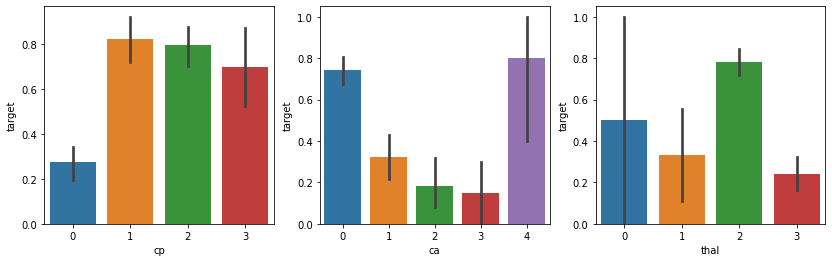

In [9]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(14,4))
ax=sns.barplot(x='cp',y='target',data=heart_data,ax=axes[0])
ax=sns.barplot(x='ca',y='target',data=heart_data,ax=axes[1])
ax=sns.barplot(x='thal',y='target',data=heart_data,ax=axes[2])

Lets split the data into train and test set using train_test_split from sklearn.

In [10]:
from sklearn.model_selection import train_test_split
y=heart_data['target']
X=heart_data.drop(['target'],axis=1)


X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=5)


Using XGBRegressor, we will develop our first model and check it's accuracy and recall score on test data. Recall score is important in this case because the cost of having false negative is high as we don't want a person with heart disease 

[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.881578947368421
0.8947368421052632


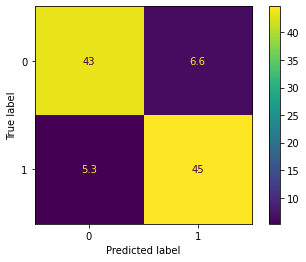

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import recall_score
my_model=XGBRegressor(n_estimators=1000,learning_rate=0.01)

my_model.fit(X_train,y_train)
preds=my_model.predict(X_valid)

preds=[0 if x<=0.5 else 1 for x in preds]

from sklearn.metrics import mean_absolute_error,accuracy_score, confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_valid,preds))
print(recall_score(y_valid,preds))
cm = confusion_matrix(y_valid, preds)/0.76
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                            )
disp.plot()